<div style="border:solid blue 2px; padding: 20px"> 

<strong>Reviewer's Introduction</strong>

Hello Jimmy! 👋 

I'm happy to review your project today.

I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> Everything is done successfully.
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> Suggestions for optimizations or improvements.
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> This must be fixed for a project to be approved.
</div>

Please don't remove my comments :) If you have any questions or comments, don't hesitate to respond to my comments by creating a box that looks like this: 
<div class="alert alert-info"> <b>Student's comment:</b> Your text here.</div>    
<br>


📌 Here's how to create code for student comments inside a Markdown cell:
    
    
    <div class="alert alert-info">
    <b> Student's comment</b>

    Your text here. 
    </div>

You can find out how to **format text** in a Markdown cell or how to **add links** [here](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet). 


<hr>
Reviewer: Han Lee (hanlee_97297 on Discord)<br>
Don’t forget to rate your experience by leaving feedback here:  
<a href="https://form.typeform.com/to/msiTC4LB" target="_blank">https://form.typeform.com/to/msiTC4LB</a>
</div>

<div style="border: solid blue 2px; padding: 15px; margin: 10px">
	<b>Reviewer's Comments</b>

Congratulations! 

This project meets all requirements ✅, and is approved. 🎉

Well done on a project in which you went over and beyond the minimum requirements. The hard work you put into the project shows, and will help you become a better data scientist.

<b>Notable strengths:</b>  

✔️ Thorough data preparation and cleaning.  

✔️ Extensive discussions interspersed throughout the notebook helped me understand your thought process and decisions. Well done.

✔️ Judicious use of visualizations to communicate data insights.

✔️ Additional investigations that delivered insights, for example, on the amount of minute, message, and data consumption required to make subscription to the Ultimate plan economically sensible.
<hr>

One general recommendation, as discussed below, is always to **explicitly** state your null and alternate hypotheses before testing. Doing so helps maintain the integrity of the findings. 

Once again, congratulations on an impressive project. Well done, and I wish you continued success in upcoming spri
</div>


# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st


## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Display the df for plans
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I notice it included mb_per_month_included instead of gb_per_month_included. Even though surf plan is cheaper than the ultimate, surf package doesn't include much minutes, messages, or data per month and the surcharges are higher than the ultimate package. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
# Fix the column name usd_monthly_pay to ''_fee
plans = plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We can see that the Ultimate has 20 times more than Surf for messages, 2 times more for GB, 6 times more for mins. Even though the base is 3.5 times more than Surf plan, it wouldn't take much to match the Ultimate plan if a Surf user doubled the mins, texts, and just go 1 GB over the data limit.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

We're going to run a scenario how much it would cost a Surf user if they ended up using the data amount that's the same as a Ultimate user's limit. 

Remember, the plan doesn't charge per minute, text, and GB till it exceeds it's package. 

In [7]:
# Calculate how much it would cost if surf plan user exceeded by double the limits for Surf Users: 
# let's see how much it would cost Surf if they doubled their package plan
mins = plans['minutes_included'] * 2
rate_mins = 0.03
overage_mins = (mins - plans['minutes_included']) * rate_mins  
texts = plans['messages_included'] * 2
rate_texts = .03
overage_texts = (texts - plans['messages_included']) * rate_texts
gb = plans['mb_per_month_included'] * 2 
gb_overage = ((gb - plans['mb_per_month_included']) / 1024) * plans['usd_per_gb']

plans['double_trouble'] = plans['usd_monthly_fee'] + overage_mins + overage_texts + gb_overage

print(plans['double_trouble'])
display(plans)

0    186.5
1    400.0
Name: double_trouble, dtype: float64


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,50,15360,500,20,10,0.03,0.03,surf,186.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,400.0


In [8]:

#Running a scenario where a Surf_user uses the amount of an Ultimate user's data plan

mins = plans['minutes_included'] * 6
rate_mins = 0.03
overage_mins = (mins - plans['minutes_included']) * rate_mins  
texts = plans['messages_included'] * 20
rate_texts = .03
overage_texts = (texts - plans['messages_included']) * rate_texts
gb = plans['mb_per_month_included'] * 2 
gb_overage = ((gb - plans['mb_per_month_included']) / 1024) * plans['usd_per_gb']

plans['double_trouble'] = plans['usd_monthly_fee'] + overage_mins + overage_texts + gb_overage

print(plans['double_trouble'])

display(plans)


0     273.5
1    1300.0
Name: double_trouble, dtype: float64


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,50,15360,500,20,10,0.03,0.03,surf,273.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0


As you can see, if the Surf user is a heavy data person as an ultimate, they would have to pay an extra $123.50 in surcharges. If an Ultimate user truly needs 6 times the minutes, 20 times the text, and two times the GB limit, they should consider finding a new cellular provider with unlimited data! 

Let's try a breakeven scenario!!

In [9]:
surf_base = plans.loc[plans['plan_name'] == 'surf','usd_monthly_fee'].values[0]
ultimate_base = plans.loc[plans['plan_name'] == 'ultimate','usd_monthly_fee'].values[0]

# How much extra minutes would the user need to equal the Ultimate base package?
rate_min = plans.loc[plans['plan_name'] == 'surf','usd_per_minute'].values[0]
extra_mins = round(((ultimate_base-surf_base) / rate_min),0)

# How much extra text messages would the user need to equal the Ultimate base package?
rate_messages = plans.loc[plans['plan_name'] == 'surf','usd_per_message'].values[0]
extra_messages = round((ultimate_base-surf_base) / rate_messages,0)

# How much extra gb would the user need to equal the Ultimate base package?
gb_amt = plans.loc[plans['plan_name'] == 'surf','usd_per_gb'].values[0]
extra_gb = (ultimate_base-surf_base) / gb_amt

print(f"A Surf user would need to use",extra_mins, "extra minutes for Ultimate to be cheaper")
print(f"A Surf user would need to use",extra_messages, "extra text messages for Ultimate to be cheaper")
print(f"A Surf user would need to use",extra_gb, "extra GB for Ultimate to be cheaper")

A Surf user would need to use 1667.0 extra minutes for Ultimate to be cheaper
A Surf user would need to use 1667.0 extra text messages for Ultimate to be cheaper
A Surf user would need to use 5.0 extra GB for Ultimate to be cheaper



<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 1:</b><br>
Well done with supplemental analysis that is insightful.
</div>

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


We that we have missing data for chun_date but note that "if the value is missing, the calling plan was being used when this db was extracted"

In [11]:
# Print a sample of data for users
display(users.sample(10, random_state=369))
print(users['reg_date'].head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
295,1295,Hung,Flowers,68,"Kansas City, MO-KS MSA",2018-08-11,surf,NaN
335,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
193,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,NaN
203,1203,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,surf,NaN
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaN
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,NaN
216,1216,Reita,Atkins,29,"San Francisco-Oakland-Berkeley, CA MSA",2018-06-19,surf,NaN
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,NaN
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN


0    2018-12-24
1    2018-08-13
2    2018-10-21
3    2018-01-28
4    2018-05-23
Name: reg_date, dtype: object


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

We noticed that there's a lot of missing data (NaNs) for churn_date, we should replace NaNs with something else

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [12]:
print(users['reg_date'].head())

0    2018-12-24
1    2018-08-13
2    2018-10-21
3    2018-01-28
4    2018-05-23
Name: reg_date, dtype: object


In [13]:
# format the reg_date to datetime64[ns]
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(users['reg_date'].dtype)

datetime64[ns]


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [14]:

# Extract weekday, months, and the day of the week

users['reg_month'] = users['reg_date'].dt.month

print(users['reg_month'].value_counts())
print()
users['day'] = users['reg_date'].dt.day

print(users['day'].value_counts())
print()

users['reg_weekday'] = users['reg_date'].dt.day_name()
print(users['reg_weekday'].value_counts())


6     54
1     49
8     47
4     45
2     42
10    42
3     40
5     38
11    38
12    37
7     36
9     32
Name: reg_month, dtype: int64

27    23
6     21
26    21
1     21
4     21
21    20
3     19
5     18
30    18
8     18
11    18
20    18
12    17
13    17
17    17
19    16
24    16
16    16
22    15
9     15
29    15
7     15
23    14
14    14
25    14
10    13
28    13
18    12
15    11
2      9
31     5
Name: day, dtype: int64

Thursday     83
Monday       81
Saturday     73
Friday       72
Tuesday      70
Sunday       67
Wednesday    54
Name: reg_weekday, dtype: int64


We see that June is the hottest sale of the year following by January, August, April, etc. While September is the slowest registration of the year for year 2018. 

As for days, It looks like it's towards the end of the month or the beginning of the month. Doesn't seem like mid-month does the most registrations.

As for the day of the week, Thursdays are the busiest registration of the week while Wednesdays are the slowest registration day of the week. 

In [15]:
# Let's see how the columns look now
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day,reg_weekday
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,24,Monday
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,13,Monday
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10,21,Sunday
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1,28,Sunday
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5,23,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,9,4,Tuesday
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,2,20,Tuesday
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,12,10,Monday
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2,4,Sunday


In [16]:
# Let's lower cap the names, and city so we won't miss anything during filters
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
users['city'] = users['city'].str.lower()
users['reg_weekday'] = users['reg_weekday'].str.lower()

display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day,reg_weekday
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaN,12,24,monday
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaN,8,13,monday
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaN,10,21,sunday
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaN,1,28,sunday
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaN,5,23,wednesday


In [17]:

#remove unnecessary whitespace from the column name
users.columns = users.columns.str.strip()
display(users)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day,reg_weekday
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaN,12,24,monday
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaN,8,13,monday
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaN,10,21,sunday
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaN,1,28,sunday
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaN,5,23,wednesday
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,NaN,9,4,tuesday
496,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,NaN,2,20,tuesday
497,1497,donte,barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,NaN,12,10,monday
498,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,NaN,2,4,sunday


Let's see how many users have ultimate plan and how many are surf plan. 

In [18]:
print(users['plan'].value_counts())

surf        339
ultimate    161
Name: plan, dtype: int64


We see that we have 339 users has surf plan while the remaining 161 users are using ultimate. 

I'm a little curious in which city is highly populated with Megaline users. 

In [19]:
print(users['city'].value_counts())

new york-newark-jersey city, ny-nj-pa msa          80
los angeles-long beach-anaheim, ca msa             29
dallas-fort worth-arlington, tx msa                21
chicago-naperville-elgin, il-in-wi msa             19
philadelphia-camden-wilmington, pa-nj-de-md msa    17
                                                   ..
jacksonville, fl msa                                1
greensboro-high point, nc msa                       1
cape coral-fort myers, fl msa                       1
albany-schenectady-troy, ny msa                     1
oxnard-thousand oaks-ventura, ca msa                1
Name: city, Length: 73, dtype: int64


It looks like our highest consumers are located in the NY tri-state area by a long shot!

Let's find out how many 'Chun_date" there are where the user stopped using the service

In [20]:
# Calculate how many users stopped using the service in 2018. 
print(users['churn_date'].value_counts(dropna=False))

NaN           466
2018-12-18      3
2018-11-14      2
2018-12-31      2
2018-12-19      2
2018-09-18      1
2018-11-29      1
2018-11-11      1
2018-12-27      1
2018-11-24      1
2018-10-07      1
2018-12-22      1
2018-10-22      1
2018-09-17      1
2018-11-21      1
2018-10-13      1
2018-09-07      1
2018-12-15      1
2018-11-30      1
2018-11-18      1
2018-12-26      1
2018-07-31      1
2018-12-12      1
2018-12-30      1
2018-08-16      1
2018-10-03      1
2018-09-01      1
2018-08-19      1
2018-12-10      1
2018-11-16      1
Name: churn_date, dtype: int64


So there's 466 NaN; meaning that they are current users. We know that there's 500 users. So therefore, out of 500 users, 34 users ended the service; that's a 0.068% user drop rate (34/500). 

Let's change the NaN on churn_date to "Active Users"

In [21]:
# replace NaN in church_date to 'active users'
users['churn_date'] = users['churn_date'].fillna(value='active users')
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day,reg_weekday
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,active users,8,13,monday
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,active users,10,21,sunday
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,active users,1,28,sunday
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,active users,5,23,wednesday
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,active users,9,4,tuesday
496,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,active users,2,20,tuesday
497,1497,donte,barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,active users,12,10,monday
498,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,active users,2,4,sunday


## Calls

In [22]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Print a sample of data for calls
display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

We see that no data is missing. Now let's considering of summing up the duration for each user_id. Maybe even a sum of durtion per month on call_date. Extract the month. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [24]:
#remove unnecessary whitespace from the column name
calls.columns = calls.columns.str.strip()



In [25]:
# format the date to datetime64[ns]
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
print(calls['call_date'].dtype)


datetime64[ns]


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Extracting the Days and months

In [26]:

# Extract days and months
calls['month'] = calls['call_date'].dt.month
print(calls['month'])
print()

calls['day'] = calls['call_date'].dt.day
print(calls['day'])

0         12
1         12
2         12
3         12
4         12
          ..
137730    11
137731    10
137732     9
137733    10
137734    12
Name: month, Length: 137735, dtype: int64

0         27
1         27
2         27
3         28
4         30
          ..
137730    21
137731    20
137732    21
137733    10
137734    29
Name: day, Length: 137735, dtype: int64


In [27]:
display(calls)

,id,user_id,call_date,duration,month,day
0,1000_93,1000,2018-12-27,8.52,12,27
1,1000_145,1000,2018-12-27,13.66,12,27
2,1000_247,1000,2018-12-27,14.48,12,27
3,1000_309,1000,2018-12-28,5.76,12,28
4,1000_380,1000,2018-12-30,4.22,12,30
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,21
137731,1499_200,1499,2018-10-20,10.89,10,20
137732,1499_201,1499,2018-09-21,8.12,9,21
137733,1499_202,1499,2018-10-10,0.37,10,10


We should also sort the call_dates

In [28]:
calls_sorted = calls.sort_values(['user_id','call_date'])
display(calls_sorted)

,id,user_id,call_date,duration,month,day
9,1000_544,1000,2018-12-26,4.40,12,26
14,1000_826,1000,2018-12-26,9.96,12,26
0,1000_93,1000,2018-12-27,8.52,12,27
1,1000_145,1000,2018-12-27,13.66,12,27
2,1000_247,1000,2018-12-27,14.48,12,27
...,...,...,...,...,...,...
137708,1499_177,1499,2018-12-29,8.00,12,29
137734,1499_203,1499,2018-12-29,13.86,12,29
137638,1499_107,1499,2018-12-30,4.41,12,30
137587,1499_56,1499,2018-12-31,16.49,12,31


In [29]:
# Calculate the yearly duration for each user. 

calls['yearly_duration'] = calls.groupby(['user_id'])['duration'].transform('sum')
print(calls['yearly_duration'])
display(calls)

0          116.83
1          116.83
2          116.83
3          116.83
4          116.83
           ...   
137730    1450.31
137731    1450.31
137732    1450.31
137733    1450.31
137734    1450.31
Name: yearly_duration, Length: 137735, dtype: float64


,id,user_id,call_date,duration,month,day,yearly_duration
0,1000_93,1000,2018-12-27,8.52,12,27,116.83
1,1000_145,1000,2018-12-27,13.66,12,27,116.83
2,1000_247,1000,2018-12-27,14.48,12,27,116.83
3,1000_309,1000,2018-12-28,5.76,12,28,116.83
4,1000_380,1000,2018-12-30,4.22,12,30,116.83
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,21,1450.31
137731,1499_200,1499,2018-10-20,10.89,10,20,1450.31
137732,1499_201,1499,2018-09-21,8.12,9,21,1450.31
137733,1499_202,1499,2018-10-10,0.37,10,10,1450.31


Let's merge users to add column 'plan' to see which user is which plan. 

In [30]:
# Merge calls and users to get the plan column
plan_merge = calls.merge(users,on='user_id')
display(plan_merge)

,id,user_id,call_date,duration,month,day_x,yearly_duration,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day_y,reg_weekday
0,1000_93,1000,2018-12-27,8.52,12,27,116.83,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
1,1000_145,1000,2018-12-27,13.66,12,27,116.83,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
2,1000_247,1000,2018-12-27,14.48,12,27,116.83,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
3,1000_309,1000,2018-12-28,5.76,12,28,116.83,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
4,1000_380,1000,2018-12-30,4.22,12,30,116.83,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,active users,12,24,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,21,1450.31,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,active users,5,6,sunday
137731,1499_200,1499,2018-10-20,10.89,10,20,1450.31,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,active users,5,6,sunday
137732,1499_201,1499,2018-09-21,8.12,9,21,1450.31,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,active users,5,6,sunday
137733,1499_202,1499,2018-10-10,0.37,10,10,1450.31,shena,dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,active users,5,6,sunday


Let's consider of calculating any surcharges per plan for user_id per month_duration (sum_duration) but for now let's move on to the other csv files

## Messages

In [31]:

# Print the general/summary information about the messages' DataFrame
messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# Print a sample of data for messages
display(messages)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

We should change the format for message_date to datetime64[ns]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [33]:
#remove unnecessary whitespace from the column name
messages.columns = messages.columns.str.strip()


In [34]:
# format the date to datetime64[ns]
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
print(messages['message_date'].dtype)



datetime64[ns]


In [35]:
# Sort the table by user and message_date so it'll be easier to calculate how many messages per month
messages = messages.sort_values(['user_id','message_date'])
display(messages)

,id,user_id,message_date
10,1000_567,1000,2018-12-25
4,1000_255,1000,2018-12-26
0,1000_125,1000,2018-12-27
3,1000_251,1000,2018-12-27
8,1000_502,1000,2018-12-27
...,...,...,...
76038,1497_480,1497,2018-12-29
76042,1497_503,1497,2018-12-29
76041,1497_502,1497,2018-12-30
76020,1497_341,1497,2018-12-31


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Let's extract the days and months again. 

In [36]:
# Extract days and months
messages['month'] = messages['message_date'].dt.month
print(messages['month'])
print()

messages['day'] = messages['message_date'].dt.day
print(messages['day'])
print()

#Let's see how the df looks like 
display(messages)

10       12
4        12
0        12
3        12
8        12
         ..
76038    12
76042    12
76041    12
76020    12
76048    12
Name: month, Length: 76051, dtype: int64

10       25
4        26
0        27
3        27
8        27
         ..
76038    29
76042    29
76041    30
76020    31
76048    31
Name: day, Length: 76051, dtype: int64



,id,user_id,message_date,month,day
10,1000_567,1000,2018-12-25,12,25
4,1000_255,1000,2018-12-26,12,26
0,1000_125,1000,2018-12-27,12,27
3,1000_251,1000,2018-12-27,12,27
8,1000_502,1000,2018-12-27,12,27
...,...,...,...,...,...
76038,1497_480,1497,2018-12-29,12,29
76042,1497_503,1497,2018-12-29,12,29
76041,1497_502,1497,2018-12-30,12,30
76020,1497_341,1497,2018-12-31,12,31


Let's do a merge again to get the plan column for each user on messages df

In [37]:
# Merge messagers and users to get the plan column
messages_merge = messages.merge(users,on='user_id')
display(messages_merge.sample(5))


,id,user_id,message_date,month,day_x,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day_y,reg_weekday
11516,1077_476,1077,2018-12-22,12,22,chau,webster,23,"charlotte-concord-gastonia, nc-sc msa",2018-01-14,ultimate,active users,1,14,sunday
67214,1435_34,1435,2018-11-16,11,16,darnell,powell,23,"washington-arlington-alexandria, dc-va-md-wv msa",2018-07-24,ultimate,active users,7,24,tuesday
34913,1223_46,1223,2018-07-06,7,6,patience,wilson,37,"phoenix-mesa-chandler, az msa",2018-07-05,surf,active users,7,5,thursday
11880,1079_3,1079,2018-11-16,11,16,brian,mccall,48,"new york-newark-jersey city, ny-nj-pa msa",2018-01-26,surf,active users,1,26,friday
74068,1475_79,1475,2018-10-20,10,20,arlen,sutton,66,"dallas-fort worth-arlington, tx msa",2018-05-28,ultimate,active users,5,28,monday


We are going to circle back on calculating the surcharges for each plan going over their messages. 

## Internet

In [38]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


We will need to change the session_date to datetime[ns]64 and mb_used to int and convert to binary GB since 1 GB = 1024 MB

In [39]:
# Print a sample of data for the internet traffic
display(internet)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [40]:
# changing the format to datetime64[ns]
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
print(internet['session_date'].dtype)

datetime64[ns]


In [41]:
# Remove unnecessary whitespace from the column names
internet.columns = internet.columns.str.strip()

### Enrich data

We need to convert MB to GB so we know which user went over their package

In [42]:
# Convert MB to GB
internet['gb_used'] = internet['mb_used'] / 1024
print(internet['gb_used']) 
print()
# Let's take another look at the internet df
display(internet)

0         0.087754
1         0.000000
2         0.644922
3         0.264639
4         0.859590
            ...   
104820    0.212949
104821    0.297578
104822    0.285889
104823    0.000000
104824    0.740537
Name: gb_used, Length: 104825, dtype: float64



,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949
104821,1499_216,1499,2018-12-30,304.72,0.297578
104822,1499_217,1499,2018-09-22,292.75,0.285889
104823,1499_218,1499,2018-12-07,0.00,0.000000


[Add additional factors to the data if you believe they might be useful.]

In [43]:
#extract the day and month
internet['day'] = internet['session_date'].dt.day
print(internet['day'])
print()
internet['month'] = internet['session_date'].dt.month
print(internet['month'])
print()
# look at the new df
display(internet)


0         29
1         31
2         28
3         26
4         27
          ..
104820    20
104821    30
104822    22
104823     7
104824    24
Name: day, Length: 104825, dtype: int64

0         12
1         12
2         12
3         12
4         12
          ..
104820    10
104821    12
104822     9
104823    12
104824    12
Name: month, Length: 104825, dtype: int64



,id,user_id,session_date,mb_used,gb_used,day,month
0,1000_13,1000,2018-12-29,89.86,0.087754,29,12
1,1000_204,1000,2018-12-31,0.00,0.000000,31,12
2,1000_379,1000,2018-12-28,660.40,0.644922,28,12
3,1000_413,1000,2018-12-26,270.99,0.264639,26,12
4,1000_442,1000,2018-12-27,880.22,0.859590,27,12
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949,20,10
104821,1499_216,1499,2018-12-30,304.72,0.297578,30,12
104822,1499_217,1499,2018-09-22,292.75,0.285889,22,9
104823,1499_218,1499,2018-12-07,0.00,0.000000,7,12


It's time to convert the gb_used to int since the plan rounds up the charges if you went 1 MB over the plan. 

let's merge it so we have the user's info match. 

In [44]:
merge_internet = internet.merge(users, on = 'user_id')
display(merge_internet.sample(10))

,id,user_id,session_date,mb_used,gb_used,day_x,month,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,day_y,reg_weekday
79178,1368_375,1368,2018-06-02,372.63,0.363896,2,6,enola,ray,60,"pittsburgh, pa msa",2018-05-20,ultimate,active users,5,20,sunday
73212,1343_68,1343,2018-10-05,439.76,0.429453,5,10,teresia,ewing,43,"miami-fort lauderdale-west palm beach, fl msa",2018-08-23,surf,active users,8,23,thursday
101568,1486_89,1486,2018-12-09,93.51,0.091318,9,12,sang,solis,29,"orlando-kissimmee-sanford, fl msa",2018-12-05,surf,active users,12,5,wednesday
104134,1498_196,1498,2018-04-10,409.92,0.400313,10,4,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,active users,2,4,sunday
27990,1128_144,1128,2018-09-16,0.00,0.000000,16,9,lucius,fernandez,41,"knoxville, tn msa",2018-01-25,ultimate,active users,1,25,thursday
40711,1182_467,1182,2018-11-15,347.51,0.339365,15,11,jeff,burt,39,"charlotte-concord-gastonia, nc-sc msa",2018-05-29,surf,active users,5,29,tuesday
8455,1044_88,1044,2018-09-26,691.33,0.675127,26,9,devora,galloway,74,"albuquerque, nm msa",2018-08-30,surf,active users,8,30,thursday
101942,1488_367,1488,2018-10-27,1031.89,1.007705,27,10,shirley,jones,29,"baton rouge, la msa",2018-05-15,surf,active users,5,15,tuesday
65603,1302_149,1302,2018-10-09,138.00,0.134766,9,10,leonila,morris,62,"rochester, ny msa",2018-01-21,surf,active users,1,21,sunday
1792,1009_327,1009,2018-11-05,179.71,0.175498,5,11,gerry,little,19,"san jose-sunnyvale-santa clara, ca msa",2018-04-22,surf,active users,4,22,sunday


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [45]:
# Print out the plan conditions and make sure they are clear for you
display(plans)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,50,15360,500,20,10,0.03,0.03,surf,273.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [46]:
# Calculate the number of calls made by each user per month. Save the result.
calls['num_calls'] = calls.groupby(['user_id','month'])['month'].transform('count')
print(calls['num_calls'])

0         16
1         16
2         16
3         16
4         16
          ..
137730    45
137731    53
137732    41
137733    53
137734    65
Name: num_calls, Length: 137735, dtype: int64


In [47]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['sum_duration'] = calls.groupby(['user_id','month'])['duration'].transform('sum') # DOT explained the transform function

print(calls['sum_duration'])

display(calls)

0         116.83
1         116.83
2         116.83
3         116.83
4         116.83
           ...  
137730    288.56
137731    363.28
137732    330.37
137733    363.28
137734    468.10
Name: sum_duration, Length: 137735, dtype: float64


,id,user_id,call_date,duration,month,day,yearly_duration,num_calls,sum_duration
0,1000_93,1000,2018-12-27,8.52,12,27,116.83,16,116.83
1,1000_145,1000,2018-12-27,13.66,12,27,116.83,16,116.83
2,1000_247,1000,2018-12-27,14.48,12,27,116.83,16,116.83
3,1000_309,1000,2018-12-28,5.76,12,28,116.83,16,116.83
4,1000_380,1000,2018-12-30,4.22,12,30,116.83,16,116.83
...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,21,1450.31,45,288.56
137731,1499_200,1499,2018-10-20,10.89,10,20,1450.31,53,363.28
137732,1499_201,1499,2018-09-21,8.12,9,21,1450.31,41,330.37
137733,1499_202,1499,2018-10-10,0.37,10,10,1450.31,53,363.28


In [48]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['monthly_messages'] = messages.groupby(['user_id','month'])['message_date'].transform('count')
print(messages['monthly_messages'])
print()
#Let's see how the current df looks like
display(messages)

10       11
4        11
0        11
3        11
8        11
         ..
76038    50
76042    50
76041    50
76020    50
76048    50
Name: monthly_messages, Length: 76051, dtype: int64



,id,user_id,message_date,month,day,monthly_messages
10,1000_567,1000,2018-12-25,12,25,11
4,1000_255,1000,2018-12-26,12,26,11
0,1000_125,1000,2018-12-27,12,27,11
3,1000_251,1000,2018-12-27,12,27,11
8,1000_502,1000,2018-12-27,12,27,11
...,...,...,...,...,...,...
76038,1497_480,1497,2018-12-29,12,29,50
76042,1497_503,1497,2018-12-29,12,29,50
76041,1497_502,1497,2018-12-30,12,30,50
76020,1497_341,1497,2018-12-31,12,31,50


In [49]:

# let's calculate the sum of mb_used per month per user_id
internet['mb_per_month'] = internet.groupby(['user_id','month'])['mb_used'].transform('sum')
print(internet['mb_per_month'])
print()
# Let's convert this to GB
internet['gb_per_month'] = internet['mb_per_month'] / 1024
print(internet['gb_per_month'])
print()
# let's see how the internet df looks
display(internet)


0          1901.47
1          1901.47
2          1901.47
3          1901.47
4          1901.47
            ...   
104820    19492.43
104821    22059.21
104822    12984.76
104823    22059.21
104824    22059.21
Name: mb_per_month, Length: 104825, dtype: float64

0          1.856904
1          1.856904
2          1.856904
3          1.856904
4          1.856904
            ...    
104820    19.035576
104821    21.542197
104822    12.680430
104823    21.542197
104824    21.542197
Name: gb_per_month, Length: 104825, dtype: float64



,id,user_id,session_date,mb_used,gb_used,day,month,mb_per_month,gb_per_month
0,1000_13,1000,2018-12-29,89.86,0.087754,29,12,1901.47,1.856904
1,1000_204,1000,2018-12-31,0.00,0.000000,31,12,1901.47,1.856904
2,1000_379,1000,2018-12-28,660.40,0.644922,28,12,1901.47,1.856904
3,1000_413,1000,2018-12-26,270.99,0.264639,26,12,1901.47,1.856904
4,1000_442,1000,2018-12-27,880.22,0.859590,27,12,1901.47,1.856904
...,...,...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949,20,10,19492.43,19.035576
104821,1499_216,1499,2018-12-30,304.72,0.297578,30,12,22059.21,21.542197
104822,1499_217,1499,2018-09-22,292.75,0.285889,22,9,12984.76,12.680430
104823,1499_218,1499,2018-12-07,0.00,0.000000,7,12,22059.21,21.542197


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [50]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Aggregate calls per user per month
calls_monthly = calls.groupby(['user_id','month'], as_index=False).agg({
    'duration':'sum',
    'num_calls': 'max' # num_calls is already a count; use max to get one row per group
})
calls_monthly.rename(columns={'duration': 'total_minutes'}, inplace=True)

# Aggregate messages per user per month
messages_monthly = messages.groupby(['user_id','month'], as_index=False).agg({
    'monthly_messages': 'max'  # already counted, use max
})

# Aggregate internet usage per user per month

internet_monthly = internet.groupby(['user_id','month'],as_index=False).agg({
    'mb_per_month': 'max',  # already computed monthly sum
    'gb_per_month': 'max' # already converted
})

# Merge calls and messages
monthly_usage = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'], how='outer')

# Merge with internet usage
monthly_usage = pd.merge(monthly_usage,internet_monthly, on=['user_id','month'], how='outer')

display(monthly_usage)

,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month
0,1000,12,116.83,16.0,11.0,1901.47,1.856904
1,1001,8,171.14,27.0,30.0,6919.15,6.756982
2,1001,9,297.69,49.0,44.0,13314.82,13.002754
3,1001,10,374.11,65.0,53.0,22330.49,21.807119
4,1001,11,404.59,64.0,36.0,18504.30,18.070605
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,12.734287
2289,1361,5,NaN,NaN,2.0,1519.69,1.484072
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,0.227705


We see NaN in our columns. Let's see how many we have and let's replace them with 0s. 

In [51]:
monthly_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   int64  
 1   month             2293 non-null   int64  
 2   total_minutes     2258 non-null   float64
 3   num_calls         2258 non-null   float64
 4   monthly_messages  1806 non-null   float64
 5   mb_per_month      2277 non-null   float64
 6   gb_per_month      2277 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


We see we have a good amount of NaNs by looking at info(). Let's replace the NaNs with 0s

In [52]:
# Let's replace NaNs with 0s since we know some users don't use messages, minutes, or internet
monthly_usage.fillna({
    'total_minutes': 0,
    'num_calls': 0,
    'monthly_messages': 0,
    'mb_per_month': 0,
    'gb_per_month': 0
}, inplace=True)
# Let's check out the columns
display(monthly_usage)


,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month
0,1000,12,116.83,16.0,11.0,1901.47,1.856904
1,1001,8,171.14,27.0,30.0,6919.15,6.756982
2,1001,9,297.69,49.0,44.0,13314.82,13.002754
3,1001,10,374.11,65.0,53.0,22330.49,21.807119
4,1001,11,404.59,64.0,36.0,18504.30,18.070605
...,...,...,...,...,...,...,...
2288,1349,12,0.00,0.0,61.0,13039.91,12.734287
2289,1361,5,0.00,0.0,2.0,1519.69,1.484072
2290,1482,10,0.00,0.0,2.0,0.00,0.000000
2291,1108,12,0.00,0.0,0.0,233.17,0.227705


In [53]:
# Let's verify that we have don't have any NaNs on our table
monthly_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   int64  
 1   month             2293 non-null   int64  
 2   total_minutes     2293 non-null   float64
 3   num_calls         2293 non-null   float64
 4   monthly_messages  2293 non-null   float64
 5   mb_per_month      2293 non-null   float64
 6   gb_per_month      2293 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


Excellent!! We have replaced all the NaNs and filled all the empty data. 

In [54]:
# Add user information including the plan
monthly_usage = pd.merge(monthly_usage, users[['user_id', 'plan']], on='user_id', how='left')

# Add the plan information
monthly_usage = pd.merge(monthly_usage, plans, left_on='plan', right_on='plan_name', how='left')

# Let's look at the new df
display(monthly_usage)


,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,1000,12,116.83,16.0,11.0,1901.47,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0
1,1001,8,171.14,27.0,30.0,6919.15,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2,1001,9,297.69,49.0,44.0,13314.82,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
3,1001,10,374.11,65.0,53.0,22330.49,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
4,1001,11,404.59,64.0,36.0,18504.30,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.00,0.0,61.0,13039.91,12.734287,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2289,1361,5,0.00,0.0,2.0,1519.69,1.484072,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2290,1482,10,0.00,0.0,2.0,0.00,0.000000,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0
2291,1108,12,0.00,0.0,0.0,233.17,0.227705,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0


Let's sort the months per user to make the data a little bit cleaner. 

In [55]:
# sort the month per user_id
monthly_usage = monthly_usage.sort_values(['user_id','month'])
#let's check out if the table was sorted
display(monthly_usage)

,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,1000,12,116.83,16.0,11.0,1901.47,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0
1,1001,8,171.14,27.0,30.0,6919.15,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2,1001,9,297.69,49.0,44.0,13314.82,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
3,1001,10,374.11,65.0,53.0,22330.49,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
4,1001,11,404.59,64.0,36.0,18504.30,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,324.77,39.0,0.0,23137.69,22.595400,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2254,1499,9,330.37,41.0,0.0,12984.76,12.680430,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2255,1499,10,363.28,53.0,0.0,19492.43,19.035576,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
2256,1499,11,288.56,45.0,0.0,16813.83,16.419756,surf,50,15360,500,20,10,0.03,0.03,surf,273.5


I'm curious if there's users who has total_minutes as 0 but has more than 0 num_calls

In [56]:
min_call = monthly_usage[(monthly_usage['total_minutes'] == 0) & (monthly_usage['num_calls'] > 0)] 
display (min_call)

,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
432,1094,10,0.0,1.0,0.0,1728.71,1.688193,surf,50,15360,500,20,10,0.03,0.03,surf,273.5
1873,1407,11,0.0,2.0,1.0,290.06,0.283262,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0


aha! So that means their total minutes to be the number of calls but since they didn't pass the surcharge, we shouldn't have to worry about it!

Let's work on rounding the minutes and gb/mb used

In [57]:
# Round up the minutes (since plans charge for partial minutes as full minutes)
monthly_usage['rounded_up_mins'] = monthly_usage['total_minutes'].apply(math.ceil)
display(monthly_usage)

,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble,rounded_up_mins
0,1000,12,116.83,16.0,11.0,1901.47,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0,117
1,1001,8,171.14,27.0,30.0,6919.15,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,172
2,1001,9,297.69,49.0,44.0,13314.82,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,298
3,1001,10,374.11,65.0,53.0,22330.49,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,375
4,1001,11,404.59,64.0,36.0,18504.30,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,324.77,39.0,0.0,23137.69,22.595400,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,325
2254,1499,9,330.37,41.0,0.0,12984.76,12.680430,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,331
2255,1499,10,363.28,53.0,0.0,19492.43,19.035576,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,364
2256,1499,11,288.56,45.0,0.0,16813.83,16.419756,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,289


In [58]:

# Round up the gb_per_month
monthly_usage['rounded_up_gb'] = monthly_usage['gb_per_month'].apply(math.ceil)
#look at the new table
display(monthly_usage)


,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,double_trouble,rounded_up_mins,rounded_up_gb
0,1000,12,116.83,16.0,11.0,1901.47,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,1300.0,117,2
1,1001,8,171.14,27.0,30.0,6919.15,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,172,7
2,1001,9,297.69,49.0,44.0,13314.82,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,298,14
3,1001,10,374.11,65.0,53.0,22330.49,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,375,22
4,1001,11,404.59,64.0,36.0,18504.30,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,405,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,324.77,39.0,0.0,23137.69,22.595400,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,325,23
2254,1499,9,330.37,41.0,0.0,12984.76,12.680430,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,331,13
2255,1499,10,363.28,53.0,0.0,19492.43,19.035576,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,364,20
2256,1499,11,288.56,45.0,0.0,16813.83,16.419756,surf,50,15360,500,20,10,0.03,0.03,surf,273.5,289,17


Let's move the rounded_up_gb next to gb_per_month column

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [59]:
# Calculate the monthly revenue for each user

# Convert free data MB to GB
monthly_usage['included_gb'] = monthly_usage['mb_per_month_included'] / 1024

# Step 1: Calculate overages
monthly_usage['minutes_over'] = (monthly_usage['rounded_up_mins'] - monthly_usage['minutes_included']).clip(lower=0)
monthly_usage['messages_over'] = (monthly_usage['monthly_messages'] - monthly_usage['messages_included']).clip(lower=0)
monthly_usage['gb_over'] = (monthly_usage['rounded_up_gb'] - monthly_usage['included_gb']).clip(lower=0)

# Step 2: Calculate overage charges
monthly_usage['min_charge'] = monthly_usage['minutes_over'] * monthly_usage['usd_per_minute']
monthly_usage['message_charge'] = monthly_usage['messages_over'] * monthly_usage['usd_per_message']
monthly_usage['gb_charge'] = monthly_usage['gb_over'] * monthly_usage['usd_per_gb']

monthly_usage['monthly_revenue'] = (
    monthly_usage['usd_monthly_fee'] + 
    monthly_usage['min_charge'] + 
    monthly_usage['message_charge'] + 
    monthly_usage['gb_charge']
)

display(monthly_usage)


,user_id,month,total_minutes,num_calls,monthly_messages,mb_per_month,gb_per_month,plan,messages_included,mb_per_month_included,...,rounded_up_mins,rounded_up_gb,included_gb,minutes_over,messages_over,gb_over,min_charge,message_charge,gb_charge,monthly_revenue
0,1000,12,116.83,16.0,11.0,1901.47,1.856904,ultimate,1000,30720,...,117,2,30.0,0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,8,171.14,27.0,30.0,6919.15,6.756982,surf,50,15360,...,172,7,15.0,0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,9,297.69,49.0,44.0,13314.82,13.002754,surf,50,15360,...,298,14,15.0,0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,10,374.11,65.0,53.0,22330.49,21.807119,surf,50,15360,...,375,22,15.0,0,3.0,7.0,0.0,0.09,70.0,90.09
4,1001,11,404.59,64.0,36.0,18504.30,18.070605,surf,50,15360,...,405,19,15.0,0,0.0,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,324.77,39.0,0.0,23137.69,22.595400,surf,50,15360,...,325,23,15.0,0,0.0,8.0,0.0,0.00,80.0,100.00
2254,1499,9,330.37,41.0,0.0,12984.76,12.680430,surf,50,15360,...,331,13,15.0,0,0.0,0.0,0.0,0.00,0.0,20.00
2255,1499,10,363.28,53.0,0.0,19492.43,19.035576,surf,50,15360,...,364,20,15.0,0,0.0,5.0,0.0,0.00,50.0,70.00
2256,1499,11,288.56,45.0,0.0,16813.83,16.419756,surf,50,15360,...,289,17,15.0,0,0.0,2.0,0.0,0.00,20.0,40.00



<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 1:</b><br>
Great job here.
</div>


In [60]:

# Let's rearrange the columns but let's look at the list of columns we have
print(monthly_usage.columns.tolist()) 
# Define the exact order you want
desired_order = ['user_id', 'month', 'total_minutes', 'rounded_up_mins','minutes_over','min_charge', 
                 'num_calls', 'monthly_messages','messages_over','message_charge', 'mb_per_month', 
                 'gb_per_month', 'rounded_up_gb','gb_over','gb_charge', 'plan','monthly_revenue', 'messages_included', 
                 'mb_per_month_included', 'minutes_included', 'usd_monthly_fee', 
                 'usd_per_gb','included_gb', 'usd_per_message', 'usd_per_minute', 'plan_name', 
                 'double_trouble']

monthly_usage = monthly_usage[desired_order]

display(monthly_usage)



['user_id', 'month', 'total_minutes', 'num_calls', 'monthly_messages', 'mb_per_month', 'gb_per_month', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name', 'double_trouble', 'rounded_up_mins', 'rounded_up_gb', 'included_gb', 'minutes_over', 'messages_over', 'gb_over', 'min_charge', 'message_charge', 'gb_charge', 'monthly_revenue']


,user_id,month,total_minutes,rounded_up_mins,minutes_over,min_charge,num_calls,monthly_messages,messages_over,message_charge,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,included_gb,usd_per_message,usd_per_minute,plan_name,double_trouble
0,1000,12,116.83,117,0,0.0,16.0,11.0,0.0,0.00,...,1000,30720,3000,70,7,30.0,0.01,0.01,ultimate,1300.0
1,1001,8,171.14,172,0,0.0,27.0,30.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
2,1001,9,297.69,298,0,0.0,49.0,44.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
3,1001,10,374.11,375,0,0.0,65.0,53.0,3.0,0.09,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
4,1001,11,404.59,405,0,0.0,64.0,36.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,324.77,325,0,0.0,39.0,0.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
2254,1499,9,330.37,331,0,0.0,41.0,0.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
2255,1499,10,363.28,364,0,0.0,53.0,0.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5
2256,1499,11,288.56,289,0,0.0,45.0,0.0,0.0,0.00,...,50,15360,500,20,10,15.0,0.03,0.03,surf,273.5


Just look at the table, we see that some surf had a serious surcharges where one had to pay $70.09 or surcharges for the month of October, user 1001. 

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

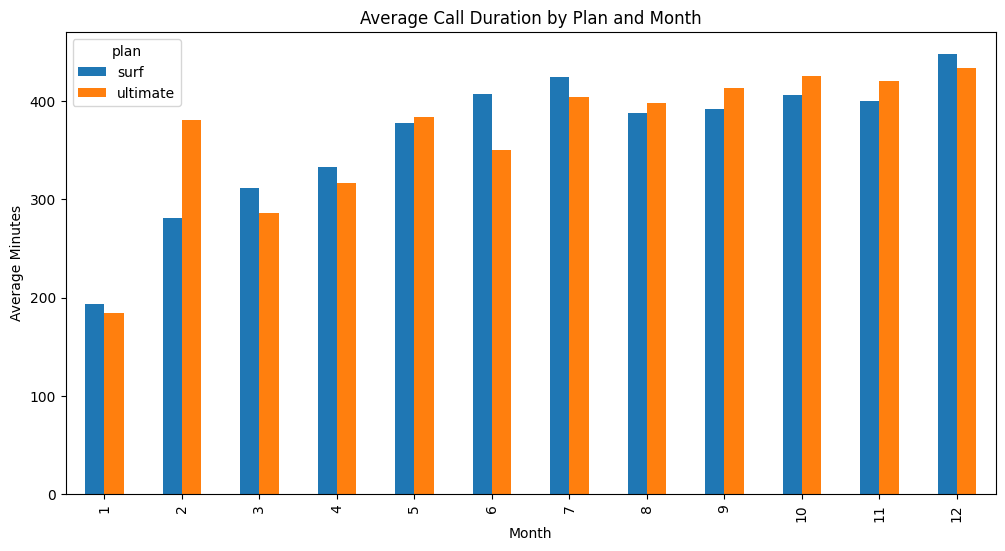

plan,surf,ultimate
month,,
1,193.000000,183.750000
2,281.333333,380.428571
3,311.434783,286.166667
4,332.920000,317.095238
5,377.532468,384.206897
6,407.690722,350.361702
7,425.000000,404.271186
8,387.660494,397.788732
9,391.453608,413.779070


In [61]:

# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_monthly_calls = monthly_usage.groupby(['plan','month'])['rounded_up_mins'].mean().reset_index()

# Pivot to get plans as columns
avg_monthly_calls = avg_monthly_calls.pivot(index='month',columns = 'plan', values = 'rounded_up_mins')

#Plot the graph
avg_monthly_calls.plot(kind='bar', figsize = (12,6))
plt.title("Average Call Duration by Plan and Month")
plt.xlabel('Month')
plt.ylabel('Average Minutes')
plt.legend(title='plan')
plt.show()
display(avg_monthly_calls)

Looks like the highest call duratoins is in December! The min amount of mins called is in Jan. There seem to be a discrepancy between surf and ultimate mins in Feb. 

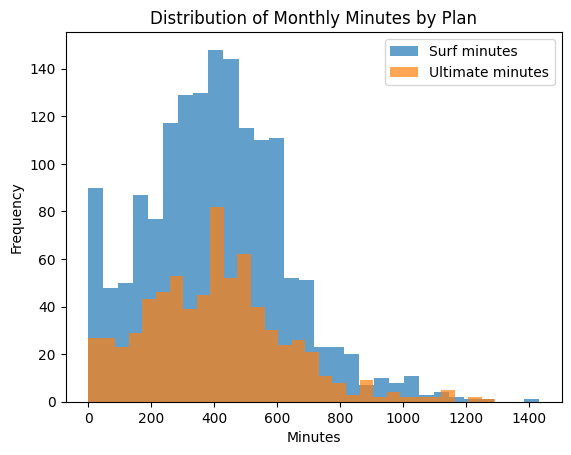

In [62]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Filter surf and ultimate users
surf_minutes = monthly_usage[monthly_usage['plan'] == 'surf']['rounded_up_mins']
ultimate_minutes = monthly_usage[monthly_usage['plan'] == 'ultimate']['rounded_up_mins']

# plot histogram
plt.hist(surf_minutes, bins=30, alpha=0.7, label='Surf minutes')
plt.hist(ultimate_minutes, bins=30, alpha=0.7, label='Ultimate minutes')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Minutes by Plan')
plt.legend()
plt.show()




Now we can see there's a discrepancy between Surf Minutes and Ultimate Minutes. If Surf users are using that many minutes, they should switch to Ultimate plan. Surf plan only allows 500 minutes a month and the Highest average is around 500 to 600 minutes a month!

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [63]:
# Calculate the mean and the variance of the monthly call duration
mean_duration = monthly_usage['rounded_up_mins'].mean()
var_duration = monthly_usage['rounded_up_mins'].var()

print(f"The Monthly mean for call duration is {mean_duration:.2f}")
print(f"The Monthly variance for call duration is {var_duration:.2f}")

The Monthly mean for call duration is 405.71
The Monthly variance for call duration is 49909.66


In [64]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# We never learned howt to plot a boxplot in sprint 3? 


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

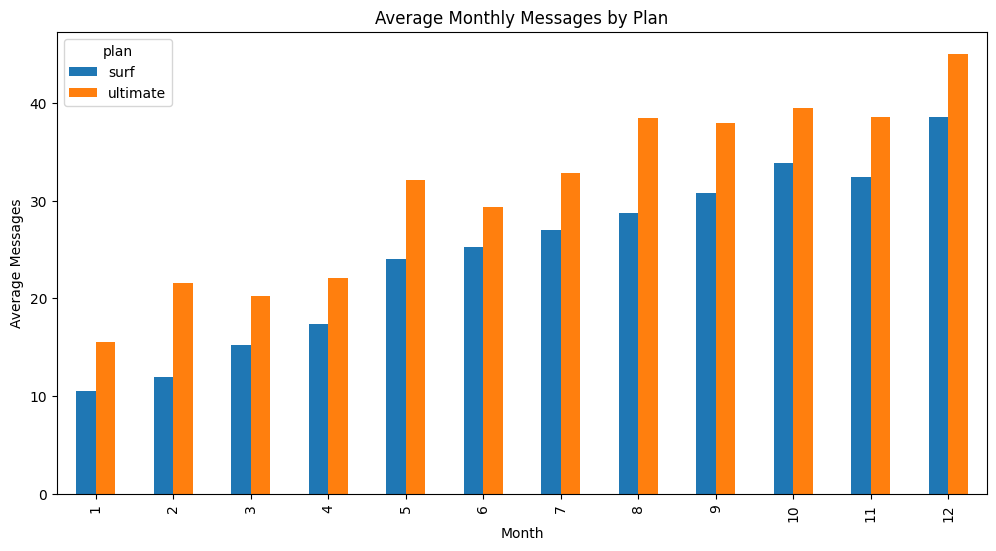

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


In [65]:

# Compare the number of messages users of each plan tend to send each month
avg_monthly_messages = monthly_usage.groupby(['plan','month'])['monthly_messages'].mean().reset_index()

# Pivot to get plans as columns
avg_monthly_messages = avg_monthly_messages.pivot(index='month',columns = 'plan', values = 'monthly_messages')

#Plot the graph
avg_monthly_messages.plot(kind='bar', figsize = (12,6))
plt.title("Average Monthly Messages by Plan")
plt.xlabel('Month')
plt.ylabel('Average Messages')
plt.legend(title='plan')
plt.show()
display(avg_monthly_messages)


Looks like average numbers of messages send for each user increases towards the end of the year. Ultimate users tend to send more messages since they have more messages as part of its plan. 

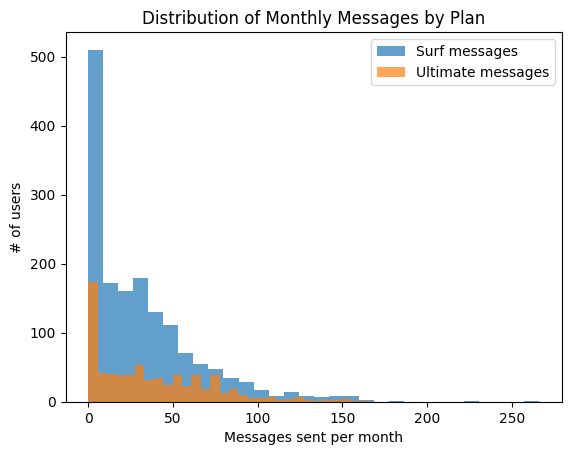

In [66]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

# Filter surf and ultimate users
surf_messages = monthly_usage[monthly_usage['plan'] == 'surf']['monthly_messages']
ultimate_messages = monthly_usage[monthly_usage['plan'] == 'ultimate']['monthly_messages']

# plot histogram
plt.hist(surf_messages, bins=30, alpha=0.7, label='Surf messages')
plt.hist(ultimate_messages, bins=30, alpha=0.7, label='Ultimate messages')
plt.xlabel('Messages sent per month')
plt.ylabel('# of users')
plt.title('Distribution of Monthly Messages by Plan')
plt.legend()
plt.show()




In [67]:
# Calculate the mean and the variance of the monthly monthly messages
mean_messages = monthly_usage['monthly_messages'].mean()
var_messages = monthly_usage['monthly_messages'].var()

print(f"The Monthly mean for messages per month is {mean_duration:.2f}")
print(f"The Monthly variance for messages per month is {var_duration:.2f}")

The Monthly mean for messages per month is 405.71
The Monthly variance for messages per month is 49909.66


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

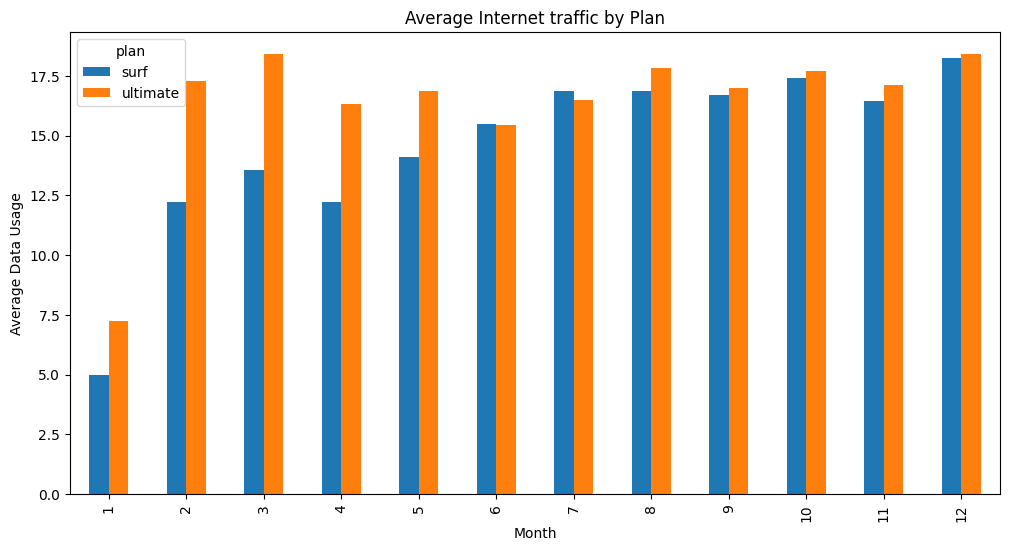

plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.220000,16.333333
5,14.116883,16.862069
6,15.484536,15.425532
7,16.876033,16.491525
8,16.882716,17.845070
9,16.690722,17.011628


In [68]:
# Compare the amount of internet traffic users of each plan tend to send each month
avg_monthly_messages = monthly_usage.groupby(['plan','month'])['rounded_up_gb'].mean().reset_index()

# Pivot to get plans as columns
avg_monthly_messages = avg_monthly_messages.pivot(index='month',columns = 'plan', values = 'rounded_up_gb')

#Plot the graph
avg_monthly_messages.plot(kind='bar', figsize = (12,6))
plt.title("Average Internet traffic by Plan")
plt.xlabel('Month')
plt.ylabel('Average Data Usage')
plt.legend(title='plan')
plt.show()
display(avg_monthly_messages)

Overall, ultimate users uses a more data since they have more GB in their package. Also, in December, Surf and Ultimate users have the same amount of internet usage. That's a lot of data overcharge for Surf users!

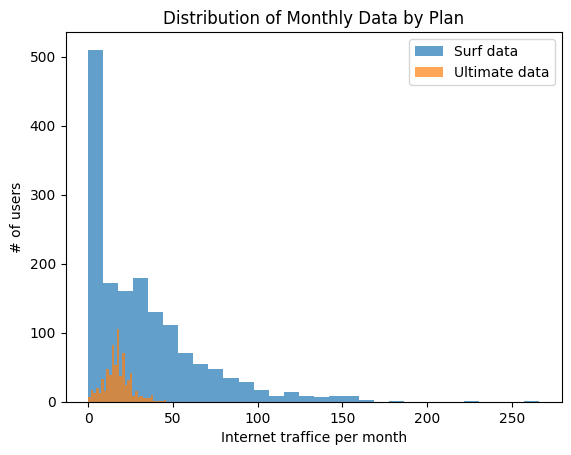

In [69]:
# Compare the amount of internet traffic consumed by users per plan and plot histogram
# Filter surf and ultimate users
surf_data = monthly_usage[monthly_usage['plan'] == 'surf']['rounded_up_gb']
ultimate_messages = monthly_usage[monthly_usage['plan'] == 'ultimate']['rounded_up_gb']

# plot histogram
plt.hist(surf_messages, bins=30, alpha=0.7, label='Surf data')
plt.hist(ultimate_messages, bins=30, alpha=0.7, label='Ultimate data')
plt.xlabel('Internet traffice per month')
plt.ylabel('# of users')
plt.title('Distribution of Monthly Data by Plan')
plt.legend()
plt.show()


wow!! Looks like Surf Data either don't use data-month at all or They use around 30-50, which would surcharge their plan since they're only allowed to have 1 GB then would be hit with a surcharge of 10 dollars per GB afterwards!Just having 11 GB in a month would be a 10GB overcharge of $100! 

In [70]:
# Calculate the mean and the variance of the monthly monthly messages
mean_data = monthly_usage['rounded_up_gb'].mean()
var_data = monthly_usage['rounded_up_gb'].var()

print(f"The Monthly mean for internet traffic per month is {mean_data:.2f}")
print(f"The Monthly variance for internet traffic per month is {var_data:.2f}")

The Monthly mean for internet traffic per month is 16.87
The Monthly variance for internet traffic per month is 60.78


The average monthly internet usage is 16.87 GB per user. Since the Surf plan only includes 15 GB per month and surcharge of $10 per data once they go over 15 GB, Surf users are likely exceeding their data allowance and having high surcharges. Not to mention that the data has 391 surf users out of 500 users. 

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [71]:


revenue_stats = monthly_usage.groupby('plan')['monthly_revenue'].agg(['mean','var','std','count']).round(2)
display(revenue_stats)



,mean,var,std,count
plan,,,,
surf,60.33,3054.10,55.26,1573
ultimate,72.31,129.85,11.40,720



**Surf plan** has a mean of \$60.33 which is over \$40 over the base monthly charges
**Ultimate plan** has an average of \$72.31 which is just around the montly charges

**Surf Plan** has a much higher variance than **ultimate** which signals a wider spread in monthly costs versus ultimate users. 


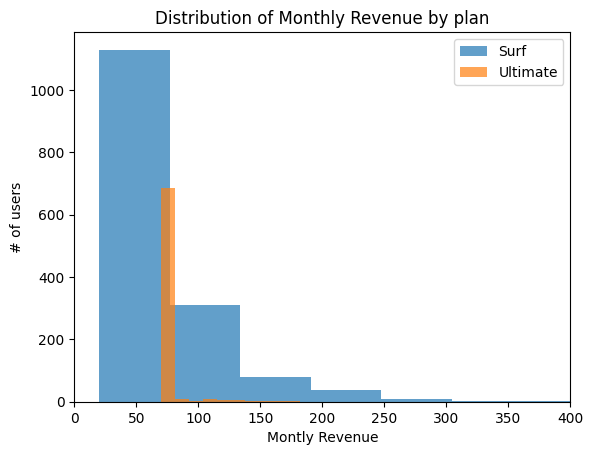

In [72]:
# Let's plot a histogram for monthly revenues
surf_monthly = monthly_usage[monthly_usage['plan'] == 'surf']['monthly_revenue']
ultimate_monthly = monthly_usage[monthly_usage['plan'] == 'ultimate']['monthly_revenue']

plt.hist(surf_monthly,alpha = 0.7, bins = 10, label = 'Surf')
plt.hist(ultimate_monthly,alpha = 0.7, bins = 10,label='Ultimate')
plt.xlim(0,400)
plt.title("Distribution of Monthly Revenue by plan")
plt.xlabel('Montly Revenue')
plt.ylabel('# of users')
plt.legend()
plt.show()

By looking at the histogram, looks like the surf monthly users makes up most of the revenues

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [73]:
# Test the hypotheses
# Let's seperate the average revenues for each plan
surf_revenue = monthly_usage[monthly_usage['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = monthly_usage[monthly_usage['plan'] == 'ultimate']['monthly_revenue']

results = st.ttest_ind(surf_revenue,ultimate_revenue)

print('p-value: ', results.pvalue)

if results.pvalue < 0.05:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  9.470478215100305e-09
We reject the null hypothesis


Since p-value is so small, and the hypothesis is rejected, there's a significant difference between the two plans: Surf and Ultimate

<div class="alert alert-warning">
	 <b>Reviewer's comment – Iteration 1:</b><br>
It is important to formally state the H0 and H1 before running your test, e.g.
Null hypothesis(H0): There is no significant difference between the two plans.
Alternate hypothesis (H1): There is a significant difference between the two plans.

Doing so avoids the temptation to cheat by choosing a hypothesis that fits the results (called p-hacking).
</div>

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [74]:
#Let's look at the columns again
monthly_usage.columns

Index(['user_id', 'month', 'total_minutes', 'rounded_up_mins', 'minutes_over',
       'min_charge', 'num_calls', 'monthly_messages', 'messages_over',
       'message_charge', 'mb_per_month', 'gb_per_month', 'rounded_up_gb',
       'gb_over', 'gb_charge', 'plan', 'monthly_revenue', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_fee',
       'usd_per_gb', 'included_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'double_trouble'],
      dtype='object')

Looks like we didn't merge city column from users yet, we will need to do that!

In [75]:
# print columns from user df
print(users.columns.tolist())
print()
# Merge monthly_usage df with city from users df
merged_data = monthly_usage.merge(users, on='user_id', how = 'left')
print(merged_data.columns.tolist())

['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'reg_month', 'day', 'reg_weekday']

['user_id', 'month', 'total_minutes', 'rounded_up_mins', 'minutes_over', 'min_charge', 'num_calls', 'monthly_messages', 'messages_over', 'message_charge', 'mb_per_month', 'gb_per_month', 'rounded_up_gb', 'gb_over', 'gb_charge', 'plan_x', 'monthly_revenue', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_fee', 'usd_per_gb', 'included_gb', 'usd_per_message', 'usd_per_minute', 'plan_name', 'double_trouble', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_y', 'churn_date', 'reg_month', 'day', 'reg_weekday']


In [76]:

# Test the hypotheses:The average revenue from users in NY-NJ area is different from that of the users from other regions.
# Let's create filters for users located in ny_nj and for other users who are not.
ny_nj_revenue = merged_data[merged_data['city'].str.contains('ny-nj')]['monthly_revenue']
others = merged_data[~merged_data['city'].str.contains('ny-nj')]['monthly_revenue']

# calculate the p-value
alpha = 0.05
results = st.ttest_ind(ny_nj_revenue,others)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value:  0.04076784279879048
We reject the null hypothesis


In [77]:
# Let's see how much of a revenue difference for users located NY-NJ area versus the other locations in the US. 

print("NY-NJ average:", ny_nj_revenue.mean())
print("Others average:", others.mean())


NY-NJ average: 59.611803713527856
Others average: 64.97624217118998


even though p-value was close to alpha 0.05, we reject the hypothesis, there's a significant difference from  users in NY-NH area and from other regions. 

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

1. We compared the two plans and calculated their revenues, surcharges, wonder why don't most surf users switch with ultimate users when it's cheaper to do that.
2. We calculated the average usage of calls/durations, messages, and internet per user per month from each plan. We notice that there's a discrepancy for average call duration by plan and month chart for the month of February. The most calls, messages, and internet are used in December.
3. The distributions of monthly minutes by plan chart shows that surf users use excessive amount of minutes. By looking at the histogram, most users would go from 400-500 minutes each month then it would drop after 500 minutes since that's their monthly limit before being overcharged.
4. For Average Monthly Messages by Plan bar chart, we see that ultimate users texts more than surf users since ultimate users have more allowance for text messages per month.
5. When looking at the Distribution of Monthly Messages by Plan histogram, we noticed there a good amount of users don't use messages at all per month.
6. For the average internet traffic by plan, looks like March and December is the most internet traffic. However, when looking at the distribution of monthly data by plan histogram, surf users uses significantly more than ultimate data. When looking at the monthly average of internet traffic (16.87 GB), we know that most of that average is coming from surf users. Since Surf users are only allowed to have 1 GB per month and after that, they receive a surcharge of $10 per GB after going 1 GB over? If a surf users did use 16 GB of data for this month, they are paying $150 overcharge for data!! While if that user went to ultimate plan, they would have 14 GB of data left! That's sure is a lot of money to throw away!
7. We did a t-test and proved that there is a significant difference between he average revenue from users of Ultimate and Surf calling plans differs and the average revenue from users in NY-NJ area is different from that of the users from other regions.